<h1><center></center></h1>
<h1><center>DSAI 308</center></h1>
<h1><center>Lab Exam 1 </center></h1>
<h2><center>Model B</center></h2>
<h2><center>Exam Time: 60 minutes</center></h2>


**Exam Instructions**
- You are allowed to open **TensorFlow & Keras documentation**, no other links or Colabs. Any form of cheating will result in a **ZERO GRADE**.

- **Disable AI assistance** tools during the exam.

- **Close all** unnecessary browser tabs and windows.

- Keep **your phone away** and on silent mode.

---



***References***

1. [TensorFlow Documentation](https://www.tensorflow.org/api_docs/python/tf/all_symbols)
2. [Keras Documentation](https://keras.io)

# **Question  -  Transfer Learning with EfficientNetB0 on TF-Flowers Dataset**

In this lab exam, you will apply **transfer learning** using the pre-trained **EfficientNetB0** model on the **TF-Flowers dataset**.

The objective is to **analyze the effects** of **transfer learning**,**fine-tuning**, and **data augmentation** on model performance.

-  [**TF-Flowers Dataset**](https://www.tensorflow.org/datasets/catalog/tf_flowers).
- [**EfficientNet Documentation**](https://keras.io/api/applications/efficientnet/)



**You are required to:**

1- Load and preprocess the TF-Flowers dataset using TensorFlow Datasets (TFDS).

2- **Resize images**, normalize them, and apply **data augmentation**.

3- Train **EfficientNetB0** with **frozen base layers** and analyze its performance **10 epochs**..

4- **Unfreeze the last 10 layers** and retrain EfficientNetB0, fine-tuning it with a lower learning rate **10 epochs**..

5- **Compare** the training and validation accuracy of both **models using visual plots**.


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np


In [2]:
# Load the TF-Flowers Dataset:
#Use TensorFlow Datasets to load the TF-Flowers dataset and explore its structure.

dataset_name = "tf_flowers"
(train_data, test_data), dataset_info = tfds.load(
    dataset_name, split=["train[:80%]", "train[80%:]"], as_supervised=True, with_info=True
)

# Print dataset details
print("Number of Classes:", dataset_info.features["label"].num_classes)
print("Class Names:", dataset_info.features["label"].names)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Number of Classes: 5
Class Names: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


In [3]:
# Check the Dataset Size & Image Shapes:

train_size = sum(1 for _ in train_data)
test_size = sum(1 for _ in test_data)
print(f"Train set size: {train_size} images")
print(f"Test set size: {test_size} images")

for image, label in train_data.take(5):
    print("Image shape:", image.shape)

Train set size: 2936 images
Test set size: 734 images
Image shape: (333, 500, 3)
Image shape: (212, 320, 3)
Image shape: (240, 320, 3)
Image shape: (240, 320, 3)
Image shape: (317, 500, 3)


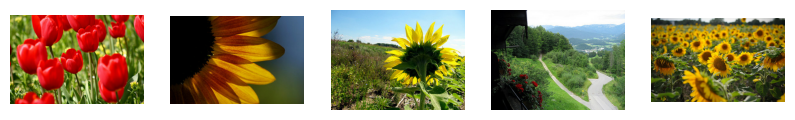

In [4]:
import matplotlib.pyplot as plt

#  Display sample images
def show_sample_images(dataset, num_images=5):
    plt.figure(figsize=(10, 5))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.axis("off")
    plt.show()

show_sample_images(train_data)

# **1- Preprocess Data: Resize, Normalize & Augment Images**

In [24]:
#[0.25 mark] Define target image size (for model input)

#IMG_SIZE = tf.image.resize(np.dtype('float')/255)

IMG_SIZE=  tf.keras.layers.Rescaling(1./255)

IMG_SIZE = (255, 255)
BATCH_SIZE = 32

In [25]:
# [0.5 mark] Apply Data Augmentation and rescale the Training Data


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=30,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
# Convert datasets to NumPy arrays (Keras ImageDataGenerator needs NumPy arrays or file paths)

train_images, train_labels = [], []
test_images, test_labels = [], []

for image, label in train_data:
    train_images.append(tf.image.resize(image, IMG_SIZE).numpy())
    train_labels.append(label.numpy())

for image, label in test_data:
    test_images.append(tf.image.resize(image, IMG_SIZE).numpy())
    test_labels.append(label.numpy())

# Convert lists to NumPy arrays
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = train_datagen.flow(train_images, train_labels, batch_size=BATCH_SIZE)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=BATCH_SIZE)

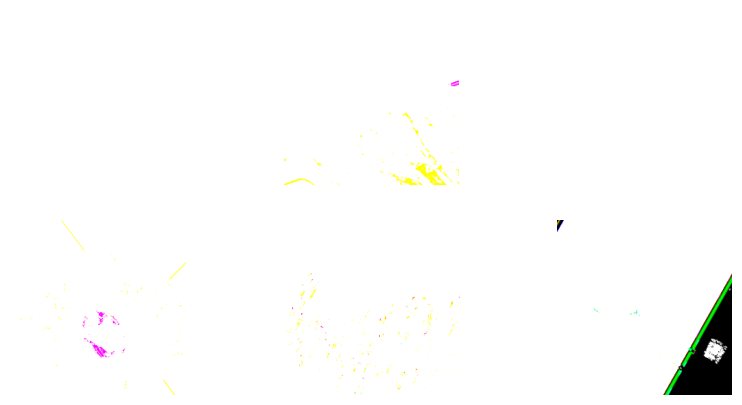

In [28]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis("off")
plt.show()

# **2- Train EfficientNetB0 with Frozen Base Layers**

In [30]:
import tensorflow as tf
import keras
from keras import layers

In [42]:
# [0.5 mark] Build base model + Add new classification layers for your classes
from tensorflow.keras import layers, models

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Call model on a test input
y = model(x_batch)

In [43]:
# [0.5 mark] Compile the model with optimizer and loss function



from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# Compile the model
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [44]:
# [0.5 mark]  Train the model and Evaluate the model on the test data

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    verbose=2
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

Epoch 1/100


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None,), output.shape=(None, 255, 255, 2)

Epoch 1/100


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None,), output.shape=(None, 255, 255, 4)

# **3- Train EfficientNetB0 with Unfrozen Last 10 Layers**

In [45]:
# [0.5 mark] Unfreeze only 10 layers.

for layer in model.layers[-10:]:
    layer.trainable = True



In [46]:
# [0.5 mark] ReCompile the model with optimizer and loss function


model.compile(
    optimizer=Adam(lr=.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ValueError: Argument(s) not recognized: {'lr': 0.01}

In [47]:
# [0.5 mark]  ReTrain the model and Evaluate the model on the test data


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=2
)

Epoch 1/10


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None,), output.shape=(None, 255, 255, 2)

# **4-Compare Model Performances**

In [ ]:
#[0.5 mark] Plot Training & Validation Accuracy between frozen and unfrozen models.



plt.figure(figsize=(10, 4))

# Training accuracy

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy (Frozen)')
plt.plot(history_history_unfrozen.history['accuracy'], label='Accuracy (Unfrozen)')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()



# Validation accuracy

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Frozen)')
plt.plot(history_history_unfrozen.history['val_accuracy'], label='Validation Accuracy (Unfrozen)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **5. Discussion**

# Answer the following questions: [0.5 mark]

Imagine you are **deploying this model** in a **real-world flower classification application**:

1- Would you keep the **model frozen or fine-tune** more layers?

2- If you wanted to **classify more than 5 flower species**, what modifications would be necessary?

3- If **given more time and resources**, how would you further improve your model’s performance?



**Your Answers:**

1-

2-

3-

# **📌 Submission Guidelines:**

- Submit your Google Colab **(.ipynb)** file .
- You could include **comments in the code to explain your choices**.
- Provide **answers to all discussion** questions.

⚠️ **Before submitting on the Classroom, CALL your TA for verification!**

 Good luck!